In [1]:
#core libraries
import numpy as np
import pandas as pd
#sklearn processing
from sklearn.preprocessing import scale, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve,validation_curve,ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
#sklearn Regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#sklearn Regression model evaluation functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BAS.csv to BAS (3).csv


In [2]:
data_pollution = pd.read_csv('BAS (3).csv')
data_pollution

,O₃ [µg/m³],NO₂ [µg/m³],SO₂ [µg/m³],PM2.5 [µg/m³],CPC [1/cm³],NOₓ [µg/m³ eq. NO₂]
0,3.7,31.1,0.9,13.5,7003.0,36.3
1,2.4,32.7,1.1,14.1,7322.2,40
2,1.9,32.2,1.2,15.9,7934.7,40.2
3,1.9,31.6,1.5,16.6,8642.7,41.6
4,2,31.5,1.2,16.6,7249.1,43.6
...,...,...,...,...,...,...
4386,161.2,6.8,0.7,5.8,7991.2,7.1
4387,144.4,8.5,0.9,5.1,7637.6,8.7
4388,123.1,9.7,0.9,5.5,8948.7,10
4389,100.1,10.5,0.6,7.7,8877.3,10.9


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataexport_20210624T151236.csv to dataexport_20210624T151236 (2).csv


In [3]:
data_weather = pd.read_csv('dataexport_20210624T151236 (2).csv')
data_weather

,Date,Temperature,Relative Humidity,Wind Speed,Wind Direction
0,1,4.730528,81,10.041354,104.534454
1,2,5.260529,79,9.000000,106.260200
2,3,5.810529,75,10.829958,111.447740
3,4,5.900528,76,8.759178,99.462320
4,5,5.690528,77,10.308831,102.094760
...,...,...,...,...,...
4386,19,28.970530,36,11.090103,346.865970
4387,20,28.260529,37,8.427383,340.016900
4388,21,27.060530,42,7.100310,329.534450
4389,22,25.770529,48,4.104631,307.875000


In [49]:
oh_enc = OneHotEncoder( )
oh_labels = oh_enc.fit_transform(data_weather[['Date']] ).toarray()

In [112]:
CBC = data_pollution['CPC [1/cm³]']
PM = data_pollution['PM2.5 [µg/m³]']
SO2 = data_pollution['SO₂ [µg/m³]']
NO2 = data_pollution['NO₂ [µg/m³]']
O3 = data_pollution['O₃ [µg/m³]']
NOX = data_pollution['NOₓ [µg/m³ eq. NO₂]']
Temperature = data_weather['Temperature']
Humidity = data_weather['Relative Humidity']
Wind_speed = data_weather['Wind Speed']
Date = data_weather['Date']

In [68]:
# Missing data
for i in range(4391):
  if(PM[i] == '-'):
    PM[i] = 0
  if(SO2[i] == '-'):
    SO2[i] = 0
  if(NO2[i] == '-'):
    NO2[i] = 0
  if(O3[i] == '-'):
    O3[i] = 0
  if(NOX[i] == '-'):
    NOX[i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [111]:
Data_Input_CBC = np.zeros((4391-24,24+3+5+1+1))
Data_output_CBC = np.zeros((4391-24,1))
Data_Input_PM = np.zeros((4391-24,24+3+5+1+1))
Data_output_PM = np.zeros((4391-24,1))
Data_Input_SO2 = np.zeros((4391-24,24+3+5+1+1))
Data_output_SO2 = np.zeros((4391-24,1))
Data_Input_NO2 = np.zeros((4391-24,24+3+5+1+1))
Data_output_NO2 = np.zeros((4391-24,1))
Data_Input_O3 = np.zeros((4391-24,24+3+5+1+1))
Data_output_O3 = np.zeros((4391-24,1))
Data_Input_NOX = np.zeros((4391-24,24+3+5+1+1))
Data_output_NOX = np.zeros((4391-24,1))

In [113]:
#Data of input data and output data
for i in range(4391-24):
  for j in range(24):
    Data_Input_CBC[i][j] = CBC[i+j]
    Data_Input_PM[i][j] = PM[i+j]
    Data_Input_SO2[i][j] = SO2[i+j]
    Data_Input_NO2[i][j] = NO2[i+j]
    Data_Input_O3[i][j] = O3[i+j]
    Data_Input_NOX[i][j] = NOX[i+j]
  
  for k in range(3):
    Data_Input_CBC[i][24+k] = Humidity[i+k+22]
    Data_Input_PM[i][24+k] = Humidity[i+k+22]
    Data_Input_SO2[i][24+k] = Humidity[i+k+22]
    Data_Input_NO2[i][24+k] = Humidity[i+k+22]
    Data_Input_O3[i][24+k] = Humidity[i+k+22]
    Data_Input_NOX[i][24+k] = Humidity[i+k+22]
  
  for l in range(5):
    Data_Input_CBC[i][27+l] = Wind_speed[i+l+20]
    Data_Input_PM[i][27+l] = Wind_speed[i+l+20]
    Data_Input_SO2[i][27+l] = Wind_speed[i+l+20]
    Data_Input_NO2[i][27+l] = Wind_speed[i+l+20]
    Data_Input_O3[i][27+l] = Wind_speed[i+l+20]
    Data_Input_NOX[i][27+l] = Wind_speed[i+l+20]
  
  Data_Input_CBC[i][32] = Temperature[i+24]
  Data_Input_PM[i][32] = Temperature[i+24]
  Data_Input_SO2[i][32] = Temperature[i+24]
  Data_Input_NO2[i][32] = Temperature[i+24]
  Data_Input_O3[i][32] = Temperature[i+24]
  Data_Input_NOX[i][32] = Temperature[i+24]

  Data_Input_CBC[i][33] = Date[i+24]
  Data_Input_PM[i][33] = Date[i+24]
  Data_Input_SO2[i][33] = Date[i+24]
  Data_Input_NO2[i][33] = Date[i+24]
  Data_Input_O3[i][33] = Date[i+24]
  Data_Input_NOX[i][33] = Date[i+24]

  Data_output_CBC[i][0] = CBC[i+24]
  Data_output_PM[i][0] = PM[i+24]
  Data_output_SO2[i][0] = SO2[i+24]
  Data_output_NO2[i][0] = NO2[i+24]
  Data_output_O3[i][0] = O3[i+24]
  Data_output_NOX[i][0] = NOX[i+24]

In [114]:
#Preparing input data for CBC
s_scaler = StandardScaler()
Data_Input_CBC_sscaled = s_scaler.fit_transform(Data_Input_CBC) 

In [115]:
#Preparing input data for PM
s_scaler = StandardScaler()
Data_Input_PM_sscaled = s_scaler.fit_transform(Data_Input_PM) 

In [116]:
#Preparing input data for SO2
s_scaler = StandardScaler()
Data_Input_SO2_sscaled = s_scaler.fit_transform(Data_Input_SO2) 

In [117]:
#Preparing input data for NO2
s_scaler = StandardScaler()
Data_Input_NO2_sscaled = s_scaler.fit_transform(Data_Input_NO2) 

In [118]:
#Preparing input data for NOX
s_scaler = StandardScaler()
Data_Input_NOX_sscaled = s_scaler.fit_transform(Data_Input_NOX) 

In [119]:
#Preparing input data for O3
s_scaler = StandardScaler()
Data_Input_O3_sscaled = s_scaler.fit_transform(Data_Input_O3) 

In [120]:
#Preparing output data for CBC
s_scaler = StandardScaler()
Data_output_CBC_sscaled = s_scaler.fit_transform(Data_output_CBC) 

In [121]:
#Preparing output data for PM
s_scaler = StandardScaler()
Data_output_PM_sscaled = s_scaler.fit_transform(Data_output_PM) 

In [122]:
#Preparing output data for SO2
s_scaler = StandardScaler()
Data_output_SO2_sscaled = s_scaler.fit_transform(Data_output_SO2) 

In [123]:
#Preparing output data for NO2
s_scaler = StandardScaler()
Data_output_NO2_sscaled = s_scaler.fit_transform(Data_output_NO2) 

In [124]:
#Preparing output data for NOX
s_scaler = StandardScaler()
Data_output_NOX_sscaled = s_scaler.fit_transform(Data_output_NOX) 

In [125]:
#Preparing output data for O3
s_scaler = StandardScaler()
Data_output_O3_sscaled = s_scaler.fit_transform(Data_output_O3) 

**Predicting** **CBC** 

In [126]:
#split data into train-test set (67% training and 33% testing data) for CBC
X_train,X_test,Y_train,Y_test=train_test_split(Data_Input_CBC_sscaled,Data_output_CBC_sscaled,test_size=0.33,random_state=42)
print(f'The shape of our training set is : {X_train.shape}')
print(f'The shape of our testing set is : {X_test.shape}')

The shape of our training set is : (2925, 34)
The shape of our testing set is : (1442, 34)


In [127]:
# LinearRegression - check the model performance / accuracy using Mean squared error (MSE) For CBC
reg=LinearRegression()
reg.fit(X_train,Y_train)
print(f'The training score is :{reg.score(X_train,Y_train)}')
print('-'*70)
print(f'The testing score is : {reg.score(X_test,Y_test)}')
print('-'*70)
Y_pred_reg=reg.predict(X_test)
print(f'MSE :{mean_squared_error(Y_pred_reg,Y_test)}')
print('-'*70)
print(f'RMSE :{np.sqrt(mean_squared_error(Y_pred_reg,Y_test))}')

The training score is :0.7484446779511081
----------------------------------------------------------------------
The testing score is : 0.7226411651794491
----------------------------------------------------------------------
MSE :0.27917469699357095
----------------------------------------------------------------------
RMSE :0.5283698486794747


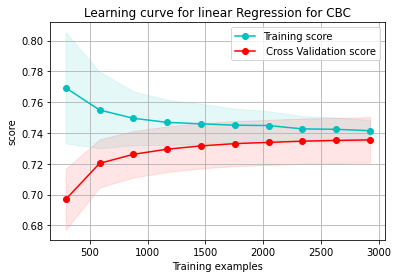

In [128]:
#learning curve for linear regression for CBC
def plot_learning_curve(estimator,title,X,Y,ylim=None,cv=None,
                        n_jobs=-1,train_sizes=np.linspace(0.1,1,10)):
  plt.figure()
  plt.title(title)
  plt.xlabel('Training examples')
  plt.ylabel('score')

  train_sizes,train_scores,test_scores= learning_curve(estimator,X,Y,cv=cv,
                                                       n_jobs=n_jobs,train_sizes=train_sizes)
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(train_sizes,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(train_sizes,test_scores_mean, marker='o', color='r', label=' Cross Validation score')

  plt.legend(loc=0)
  return plt
title= 'Learning curve for linear Regression for CBC'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=LinearRegression()
plot_learning_curve(estimator,title,Data_Input_CBC_sscaled,Data_output_CBC_sscaled,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()

**Predicting PM**

In [129]:
#split data into train-test set (67% training and 33% testing data) for PM
X_train,X_test,Y_train,Y_test=train_test_split(Data_Input_PM_sscaled,Data_output_PM_sscaled,test_size=0.33,random_state=42)
print(f'The shape of our training set is : {X_train.shape}')
print(f'The shape of our testing set is : {X_test.shape}')

The shape of our training set is : (2925, 34)
The shape of our testing set is : (1442, 34)


In [130]:
# LinearRegression - check the model performance / accuracy using Mean squared error (MSE) For PM
reg=LinearRegression()
reg.fit(X_train,Y_train)
print(f'The training score is :{reg.score(X_train,Y_train)}')
print('-'*70)
print(f'The testing score is : {reg.score(X_test,Y_test)}')
print('-'*70)
Y_pred_reg=reg.predict(X_test)
print(f'MSE :{mean_squared_error(Y_pred_reg,Y_test)}')
print('-'*70)
print(f'RMSE :{np.sqrt(mean_squared_error(Y_pred_reg,Y_test))}')

The training score is :0.9446601825940998
----------------------------------------------------------------------
The testing score is : 0.9446104039094516
----------------------------------------------------------------------
MSE :0.05744820240696843
----------------------------------------------------------------------
RMSE :0.23968354638349382


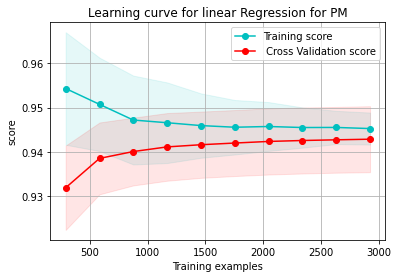

In [131]:
#learning curve for linear regression for PM
def plot_learning_curve(estimator,title,X,Y,ylim=None,cv=None,
                        n_jobs=-1,train_sizes=np.linspace(0.1,1,10)):
  plt.figure()
  plt.title(title)
  plt.xlabel('Training examples')
  plt.ylabel('score')

  train_sizes,train_scores,test_scores= learning_curve(estimator,X,Y,cv=cv,
                                                       n_jobs=n_jobs,train_sizes=train_sizes)
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(train_sizes,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(train_sizes,test_scores_mean, marker='o', color='r', label=' Cross Validation score')

  plt.legend(loc=0)
  return plt
title= 'Learning curve for linear Regression for PM'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=LinearRegression()
plot_learning_curve(estimator,title,Data_Input_PM_sscaled,Data_output_PM_sscaled,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()

**Predicting SO2**

In [132]:
#split data into train-test set (67% training and 33% testing data) for SO2
X_train,X_test,Y_train,Y_test=train_test_split(Data_Input_SO2_sscaled,Data_output_SO2_sscaled,test_size=0.33,random_state=42)
print(f'The shape of our training set is : {X_train.shape}')
print(f'The shape of our testing set is : {X_test.shape}')

The shape of our training set is : (2925, 34)
The shape of our testing set is : (1442, 34)


In [133]:
# LinearRegression - check the model performance / accuracy using Mean squared error (MSE) For SO2
reg=LinearRegression()
reg.fit(X_train,Y_train)
print(f'The training score is :{reg.score(X_train,Y_train)}')
print('-'*70)
print(f'The testing score is : {reg.score(X_test,Y_test)}')
print('-'*70)
Y_pred_reg=reg.predict(X_test)
print(f'MSE :{mean_squared_error(Y_pred_reg,Y_test)}')
print('-'*70)
print(f'RMSE :{np.sqrt(mean_squared_error(Y_pred_reg,Y_test))}')

The training score is :0.5320065578190092
----------------------------------------------------------------------
The testing score is : 0.7177233962439263
----------------------------------------------------------------------
MSE :0.22308359938279979
----------------------------------------------------------------------
RMSE :0.47231726559887666


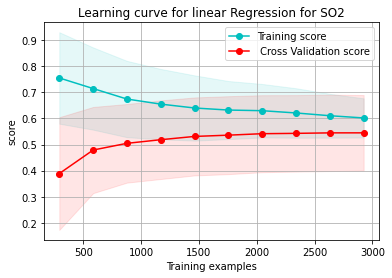

In [134]:
#learning curve for linear regression for SO2
def plot_learning_curve(estimator,title,X,Y,ylim=None,cv=None,
                        n_jobs=-1,train_sizes=np.linspace(0.1,1,10)):
  plt.figure()
  plt.title(title)
  plt.xlabel('Training examples')
  plt.ylabel('score')

  train_sizes,train_scores,test_scores= learning_curve(estimator,X,Y,cv=cv,
                                                       n_jobs=n_jobs,train_sizes=train_sizes)
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(train_sizes,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(train_sizes,test_scores_mean, marker='o', color='r', label=' Cross Validation score')

  plt.legend(loc=0)
  return plt
title= 'Learning curve for linear Regression for SO2'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=LinearRegression()
plot_learning_curve(estimator,title,Data_Input_SO2_sscaled,Data_output_SO2_sscaled,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()

**Predicting NO2**

In [135]:
#split data into train-test set (67% training and 33% testing data) for NO2
X_train,X_test,Y_train,Y_test=train_test_split(Data_Input_NO2_sscaled,Data_output_NO2_sscaled,test_size=0.33,random_state=42)
print(f'The shape of our training set is : {X_train.shape}')
print(f'The shape of our testing set is : {X_test.shape}')

The shape of our training set is : (2925, 34)
The shape of our testing set is : (1442, 34)


In [136]:
# LinearRegression - check the model performance / accuracy using Mean squared error (MSE) For NO2
reg=LinearRegression()
reg.fit(X_train,Y_train)
print(f'The training score is :{reg.score(X_train,Y_train)}')
print('-'*70)
print(f'The testing score is : {reg.score(X_test,Y_test)}')
print('-'*70)
Y_pred_reg=reg.predict(X_test)
print(f'MSE :{mean_squared_error(Y_pred_reg,Y_test)}')
print('-'*70)
print(f'RMSE :{np.sqrt(mean_squared_error(Y_pred_reg,Y_test))}')

The training score is :0.8644943061945417
----------------------------------------------------------------------
The testing score is : 0.8294567500252494
----------------------------------------------------------------------
MSE :0.1758957572155463
----------------------------------------------------------------------
RMSE :0.419399281372234


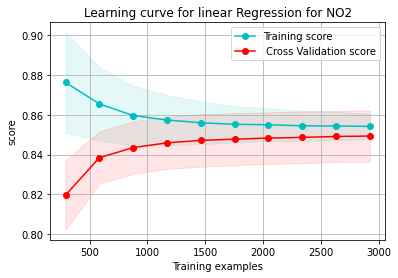

In [137]:
#learning curve for linear regression for NO2
def plot_learning_curve(estimator,title,X,Y,ylim=None,cv=None,
                        n_jobs=-1,train_sizes=np.linspace(0.1,1,10)):
  plt.figure()
  plt.title(title)
  plt.xlabel('Training examples')
  plt.ylabel('score')

  train_sizes,train_scores,test_scores= learning_curve(estimator,X,Y,cv=cv,
                                                       n_jobs=n_jobs,train_sizes=train_sizes)
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(train_sizes,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(train_sizes,test_scores_mean, marker='o', color='r', label=' Cross Validation score')

  plt.legend(loc=0)
  return plt
title= 'Learning curve for linear Regression for NO2'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=LinearRegression()
plot_learning_curve(estimator,title,Data_Input_NO2_sscaled,Data_output_NO2_sscaled,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()

**Predecting** **NOX**

In [138]:
#split data into train-test set (67% training and 33% testing data) for NOX
X_train,X_test,Y_train,Y_test=train_test_split(Data_Input_NOX_sscaled,Data_output_NOX_sscaled,test_size=0.33,random_state=42)
print(f'The shape of our training set is : {X_train.shape}')
print(f'The shape of our testing set is : {X_test.shape}')

The shape of our training set is : (2925, 34)
The shape of our testing set is : (1442, 34)


In [139]:
# LinearRegression - check the model performance / accuracy using Mean squared error (MSE) For NOX
reg=LinearRegression()
reg.fit(X_train,Y_train)
print(f'The training score is :{reg.score(X_train,Y_train)}')
print('-'*70)
print(f'The testing score is : {reg.score(X_test,Y_test)}')
print('-'*70)
Y_pred_reg=reg.predict(X_test)
print(f'MSE :{mean_squared_error(Y_pred_reg,Y_test)}')
print('-'*70)
print(f'RMSE :{np.sqrt(mean_squared_error(Y_pred_reg,Y_test))}')

The training score is :0.8330009364218681
----------------------------------------------------------------------
The testing score is : 0.798227160547869
----------------------------------------------------------------------
MSE :0.20623448344994663
----------------------------------------------------------------------
RMSE :0.4541304696339441


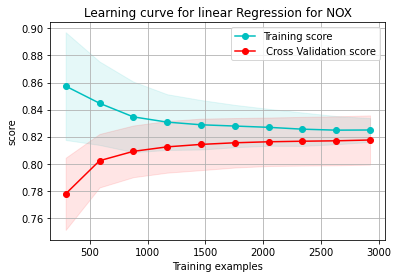

In [140]:
#learning curve for linear regression for NOX
def plot_learning_curve(estimator,title,X,Y,ylim=None,cv=None,
                        n_jobs=-1,train_sizes=np.linspace(0.1,1,10)):
  plt.figure()
  plt.title(title)
  plt.xlabel('Training examples')
  plt.ylabel('score')

  train_sizes,train_scores,test_scores= learning_curve(estimator,X,Y,cv=cv,
                                                       n_jobs=n_jobs,train_sizes=train_sizes)
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(train_sizes,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(train_sizes,test_scores_mean, marker='o', color='r', label=' Cross Validation score')

  plt.legend(loc=0)
  return plt
title= 'Learning curve for linear Regression for NOX'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=LinearRegression()
plot_learning_curve(estimator,title,Data_Input_NOX_sscaled,Data_output_NOX_sscaled,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()

**Predicting O3**

In [141]:
#split data into train-test set (67% training and 33% testing data) for O3
X_train,X_test,Y_train,Y_test=train_test_split(Data_Input_O3_sscaled,Data_output_O3_sscaled,test_size=0.33,random_state=42)
print(f'The shape of our training set is : {X_train.shape}')
print(f'The shape of our testing set is : {X_test.shape}')

The shape of our training set is : (2925, 34)
The shape of our testing set is : (1442, 34)


In [142]:
# LinearRegression - check the model performance / accuracy using Mean squared error (MSE) For O3
reg=LinearRegression()
reg.fit(X_train,Y_train)
print(f'The training score is :{reg.score(X_train,Y_train)}')
print('-'*70)
print(f'The testing score is : {reg.score(X_test,Y_test)}')
print('-'*70)
Y_pred_reg=reg.predict(X_test)
print(f'MSE :{mean_squared_error(Y_pred_reg,Y_test)}')
print('-'*70)
print(f'RMSE :{np.sqrt(mean_squared_error(Y_pred_reg,Y_test))}')

The training score is :0.9261028953132592
----------------------------------------------------------------------
The testing score is : 0.9363408220980755
----------------------------------------------------------------------
MSE :0.06438745257576799
----------------------------------------------------------------------
RMSE :0.2537468277156741


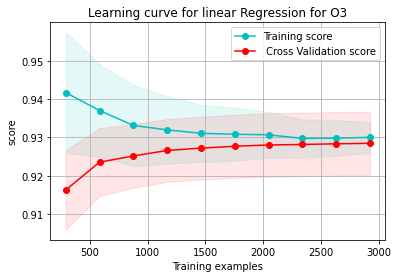

In [143]:
#learning curve for linear regression for O3
def plot_learning_curve(estimator,title,X,Y,ylim=None,cv=None,
                        n_jobs=-1,train_sizes=np.linspace(0.1,1,10)):
  plt.figure()
  plt.title(title)
  plt.xlabel('Training examples')
  plt.ylabel('score')

  train_sizes,train_scores,test_scores= learning_curve(estimator,X,Y,cv=cv,
                                                       n_jobs=n_jobs,train_sizes=train_sizes)
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(train_sizes,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(train_sizes,test_scores_mean, marker='o', color='r', label=' Cross Validation score')

  plt.legend(loc=0)
  return plt
title= 'Learning curve for linear Regression for O3'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=LinearRegression()
plot_learning_curve(estimator,title,Data_Input_O3_sscaled,Data_output_O3_sscaled,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()